This notebook goes along with the Deep Learning using Keras tutorial on Medium.

- [Keras tutorial: classification](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)

In [78]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### In this model, we are going to predict if patients have diabetes or not.

In [102]:
# read in training data
diabetes_df = pd.read_csv('diabetes_data.csv')

# view data structure
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
# create a dataframe with all training data except the target column
data_X = diabetes_df.drop(columns=['diabetes'])

# check that the target variable has been removed
data_X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [108]:
# one-hot encode target column
data_y = to_categorical(diabetes_df.diabetes)

# check that target column has been converted
diabetes_df.diabetes[:5],data_y[:5]

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: diabetes, dtype: int64, array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.]], dtype=float32))

### Simple model

In [109]:
# create simple model
model_s = Sequential()  # simple model

#get number of columns in training data
n_cols = data_X.shape[1]

#add layers to model
model_s.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s.add(Dense(10, activation='relu'))
model_s.add(Dense(2, activation='softmax'))

In [114]:
# compile model using accuracy to measure model performance
model_s.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [111]:
model_s.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 22        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [115]:
# train model with all data
model_s.fit(data_X, data_y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 1s 876us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 2/30
614/614 [==============================] - 0s 42us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 3/30
614/614 [==============================] - 0s 41us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 4/30
614/614 [==============================] - 0s 41us/step - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429


### Increase model capacity

In [120]:
#create model
model_b = Sequential()

#get number of columns in training data
n_cols = data_X.shape[1]

#add layers to model
model_b.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model_b.add(Dense(100, activation='relu'))
model_b.add(Dense(25, activation='relu'))
model_b.add(Dense(2, activation='softmax'))

In [121]:
model_big.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 250)               2250      
_________________________________________________________________
dense_50 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_51 (Dense)             (None, 25)                6275      
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 52        
Total params: 71,327
Trainable params: 71,327
Non-trainable params: 0
_________________________________________________________________


In [122]:
# compile model using accuracy to measure model performance
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [123]:
# fit model
model_b.fit(data_X, data_y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 1s 1ms/step - loss: 3.7034 - acc: 0.5212 - val_loss: 1.2911 - val_acc: 0.6039
Epoch 2/30
614/614 [==============================] - 0s 57us/step - loss: 1.1180 - acc: 0.6238 - val_loss: 1.3614 - val_acc: 0.6494
Epoch 3/30
614/614 [==============================] - 0s 57us/step - loss: 1.0136 - acc: 0.6189 - val_loss: 0.8876 - val_acc: 0.6558
Epoch 4/30
614/614 [==============================] - 0s 55us/step - loss: 0.6886 - acc: 0.6694 - val_loss: 0.8402 - val_acc: 0.5844
Epoch 5/30
614/614 [==============================] - 0s 57us/step - loss: 0.9945 - acc: 0.6384 - val_loss: 0.7243 - val_acc: 0.6234
Epoch 6/30
614/614 [==============================] - 0s 54us/step - loss: 0.7157 - acc: 0.6368 - val_loss: 0.8783 - val_acc: 0.6364
Epoch 7/30
614/614 [==============================] - 0s 55us/step - loss: 0.8013 - acc: 0.6564 - val_loss: 0.7063 - val_acc: 0.6753
Epoch 8/30
614/614 [====

### Test of model_s and model_big

> Split dataframe into the train and test set

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576, 2), (192, 2))

### small model: model_s1

In [128]:
# create simple model
model_s1 = Sequential()  # simple model

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_s1.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_s1.add(Dense(10, activation='relu'))
model_s1.add(Dense(2, activation='softmax'))

In [129]:
# compile model using accuracy to measure model performance
model_s1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [130]:
# train model
hist = model_s1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 576 samples, validate on 192 samples
Epoch 1/30
576/576 [==============================] - 1s 1ms/step - loss: 1.2044 - acc: 0.6510 - val_loss: 1.2885 - val_acc: 0.6250
Epoch 2/30
576/576 [==============================] - 0s 42us/step - loss: 1.1040 - acc: 0.6528 - val_loss: 1.2297 - val_acc: 0.6302
Epoch 3/30
576/576 [==============================] - 0s 43us/step - loss: 1.0636 - acc: 0.6510 - val_loss: 1.1749 - val_acc: 0.6458
Epoch 4/30
576/576 [==============================] - 0s 42us/step - loss: 1.0248 - acc: 0.6562 - val_loss: 1.0709 - val_acc: 0.6562
Epoch 5/30
576/576 [==============================] - 0s 43us/step - loss: 0.9724 - acc: 0.6615 - val_loss: 1.0307 - val_acc: 0.6562
Epoch 6/30
576/576 [==============================] - 0s 42us/step - loss: 0.9464 - acc: 0.6719 - val_loss: 0.9777 - val_acc: 0.6823
Epoch 7/30
576/576 [==============================] - 0s 43us/step - loss: 0.9193 - acc: 0.6597 - val_loss: 0.9455 - val_acc: 0.6875
Epoch 8/30
576/576 [====

In [131]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

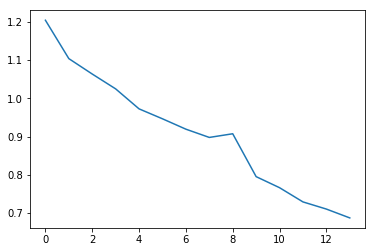

In [132]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

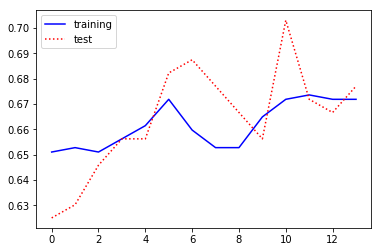

In [133]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [134]:
# 전체 테스트 데이터에 대한 예측
x_pred = model_s1.predict_classes(X_test, verbose=1)

192/192 [==============================] - 0s 1ms/step


In [135]:
x_pred,np.argmax(y_test, axis=1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [136]:
true_y=np.argmax(y_test, axis=1)

In [137]:
t_count = np.sum(x_pred==true_y) # True positive
f_count = np.sum(x_pred!=true_y) # False positive
f_count==len(true_y)-t_count

True

In [138]:
t_count,f_count

(130, 62)

In [139]:
accuracy = t_count/len(true_y)*100
accuracy

67.70833333333334

### Big model: model_big1

In [140]:
#create model with larger capacity
model_big1 = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model_big1.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model_big1.add(Dense(250, activation='relu'))
model_big1.add(Dense(25, activation='relu'))
model_big1.add(Dense(2, activation='softmax'))

In [141]:
# compile model using accuracy to measure model performance
model_big1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [142]:
# train model
hist = model_big1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])  # validation_split=0.2

Train on 576 samples, validate on 192 samples
Epoch 1/30
576/576 [==============================] - 1s 1ms/step - loss: 4.5897 - acc: 0.6059 - val_loss: 2.8630 - val_acc: 0.5104
Epoch 2/30
576/576 [==============================] - 0s 71us/step - loss: 1.0095 - acc: 0.5573 - val_loss: 0.6653 - val_acc: 0.6458
Epoch 3/30
576/576 [==============================] - 0s 71us/step - loss: 0.6491 - acc: 0.6493 - val_loss: 0.6377 - val_acc: 0.6510
Epoch 4/30
576/576 [==============================] - 0s 71us/step - loss: 0.6328 - acc: 0.6701 - val_loss: 0.6134 - val_acc: 0.6823
Epoch 5/30
576/576 [==============================] - 0s 71us/step - loss: 0.6324 - acc: 0.6719 - val_loss: 0.6232 - val_acc: 0.6458
Epoch 6/30
576/576 [==============================] - 0s 71us/step - loss: 0.6008 - acc: 0.6927 - val_loss: 0.6089 - val_acc: 0.6875
Epoch 7/30
576/576 [==============================] - 0s 69us/step - loss: 0.6375 - acc: 0.6545 - val_loss: 0.6908 - val_acc: 0.5990
Epoch 8/30
576/576 [====

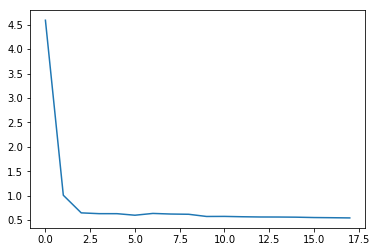

In [143]:
# Plot performance
plt.plot(hist.history['loss'])
plt.show()

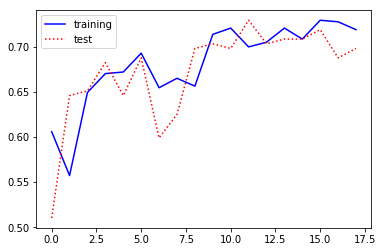

In [144]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [145]:
# 전체 테스트 데이터에 대한 예측
x_pred = model_big1.predict_classes(X_test, verbose=1)

192/192 [==============================] - 0s 1ms/step


In [146]:
x_pred,np.argmax(y_test, axis=1)

(array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [147]:
true_y=np.argmax(y_test, axis=1)

In [148]:
t_count = np.sum(x_pred==true_y) # True positive
f_count = np.sum(x_pred!=true_y) # False positive
f_count==len(true_y)-t_count

True

In [149]:
t_count,f_count

(134, 58)

In [150]:
accuracy = t_count/len(true_y)*100
accuracy

69.79166666666666

### Model with large capacity is slightly better than the model with small capacity.